In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerAut2 as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')

In [32]:
Uo10 = np.load('../data/L63-trajectories/train10.npy')
Vo = np.load('../data/L63-trajectories/test.npy')
L0, L1 = 0.25, 5
beta = 7e-8
training_points = 25000
n_repeats = 500
tau_f_kwargs = {'error_threshold' : 0.05, 'dt': 0.02, 'Lyapunov_time': 1/0.91}

In [33]:
D_r, B, alpha, batch_size, normalize = 256, 1, 0.9, 100, False
Uo = np.load(f'../data/L63-trajectories/train{B}.npy')
drf_args = [D_r, B, alpha, L0, L1, Uo, beta, 'EulerN', f"../data/EulerAut2/depth-{B}/D_r-{D_r}{'' if not normalize else '-normalized'}", normalize]
batch = arch.BatchDeepRF(Uo, Vo, *drf_args)
batch.run(training_points, n_repeats, batch_size, **tau_f_kwargs)

Running experiments for batch 0...
Time taken = 6.69E+00s
Running experiments for batch 1...
Time taken = 6.76E+00s
Running experiments for batch 2...
Time taken = 6.66E+00s
Running experiments for batch 3...
Time taken = 6.96E+00s
Running experiments for batch 4...
Time taken = 7.13E+00s
Time taken by run is 34.2030 seconds


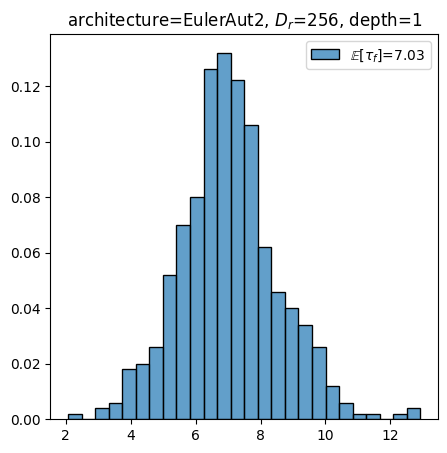

Time taken by get_tau_f is 0.0357 seconds
Time taken by get_tau_f is 0.0452 seconds
Time taken by get_tau_f is 0.0415 seconds
Time taken by get_tau_f is 0.0483 seconds
Time taken by get_tau_f is 0.0367 seconds
Time taken by get_tau_f is 0.0400 seconds
Time taken by get_tau_f is 0.0268 seconds
Time taken by get_tau_f is 0.0392 seconds
Time taken by get_tau_f is 0.0528 seconds
Time taken by get_tau_f is 0.0392 seconds
Time taken by get_tau_f is 0.0452 seconds
Time taken by get_tau_f is 0.0450 seconds
Time taken by get_tau_f is 0.0411 seconds
Time taken by get_tau_f is 0.0343 seconds
Time taken by get_tau_f is 0.0402 seconds
Time taken by get_tau_f is 0.0415 seconds
Time taken by get_tau_f is 0.0421 seconds
Time taken by get_tau_f is 0.0425 seconds
Time taken by get_tau_f is 0.0407 seconds
Time taken by get_tau_f is 0.0351 seconds
Time taken by get_tau_f is 0.0431 seconds
Time taken by get_tau_f is 0.0424 seconds
Time taken by get_tau_f is 0.0352 seconds
Time taken by get_tau_f is 0.0386 

In [34]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
tau_f = batch.get_data()['tau_f_se']
sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[\tau_f]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(fr'architecture=EulerAut2, $D_r$={D_r}, depth={batch.drf.net.B}')
plt.savefig(f'{batch.drf.save_folder}/tau_f.png', bbox_inches='tight', dpi=300)